In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from Components.DifferentiablePolynomial import *
from Models.ModelExponential import *
from Models.ModelSinCos import *
from Models.ModelWeightedSum import *
from GraphDecomposition.DirectedFunctionalGraph import DirectedFunctionalGraph

/nfs_home/niuxy/AutoAI/GraphDecomposition/DirectedFunctionalGraph.py:20: UserWarning: Parents of 3 previously defined as (6, 7), attempting to overwrite with (1, 2)
  warnings.warn(f'Parents of {v_of_edge} previously defined as {self.nodes[v_of_edge]["parents"]}, attempting to overwrite with {u_of_edge}')
/nfs_home/niuxy/AutoAI/GraphDecomposition/DirectedFunctionalGraph.py:20: UserWarning: Parents of 4 previously defined as [2], attempting to overwrite with [3]
  warnings.warn(f'Parents of {v_of_edge} previously defined as {self.nodes[v_of_edge]["parents"]}, attempting to overwrite with {u_of_edge}')


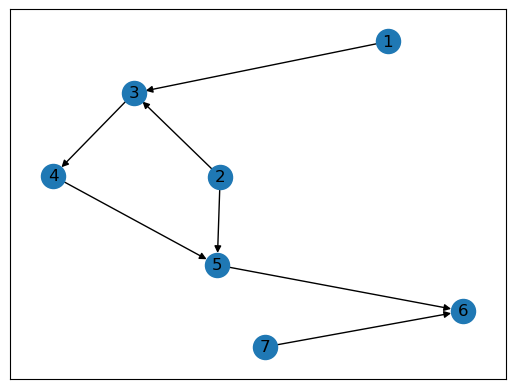

In [2]:
DG = DirectedFunctionalGraph()
DG.add_node(1, component=DifferentiablePolynomial())
DG.add_node(2, component=ModelSinCos())
DG.add_node(3, component=ModelWeightedSum())
DG.add_node(4, component=ModelExponential())
DG.add_node(5, component=ModelWeightedSum())
DG.add_node(6, component=ModelWeightedSum())
DG.add_node(7, component=ModelSinCos())

# Test warning for multiple parents
DG.add_edge((6,7),3)
DG.add_edge((1,2),3)

DG.add_edge((4,2),5)

# Test warning for singular parents
DG.add_edge(2,4)
DG.add_edge(3,4)

DG.add_edge((7,5),6)
list(DG.predecessors(3))
nx.draw_networkx(DG)

In [3]:
input_1 = 1.4
input_2 = 2.4

output_1 = DG.forward({1: input_1}, 1)
output_2 = DG.forward({2: input_2}, 2)
print(output_1)
print(output_2)
print(DG.forward({3: [output_1, output_2]}, 3))
print(DG.forward({1: input_1, 2: input_2}, 3))

tensor(1.5220, dtype=torch.float64)
tensor(0.2392, dtype=torch.float64)
tensor(1.7612, dtype=torch.float64)
tensor(1.7612, dtype=torch.float64)


In [4]:
input_1 = 1.4
input_2 = 2.4
input_7 = 3.4

output_1 = DG.forward({1: input_1}, 1)
output_3 = DG.forward({1: input_1, 2: input_2}, 3)
output_4 = DG.forward({4: output_3}, 4)
output_5 = DG.forward({5: (output_4, output_2)}, 5)
output_7 = DG.forward({7: input_7}, 7)
print(output_1)
print(output_3)
print(output_5)
print(output_7)
print(DG.forward({6: [output_5, output_7]}, 6))
print(DG.forward({1: input_1, 2: input_2, 7: input_7}, 6))

tensor(1.5220, dtype=torch.float64)
tensor(1.7612, dtype=torch.float64)
tensor(0.4111, dtype=torch.float64)
tensor(-0.6878, dtype=torch.float64)
tensor(-0.2767, dtype=torch.float64)
tensor(-0.2767, dtype=torch.float64)
